In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("stud.csv")


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [126]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in gender variable:" ,df['gender'].unique())
print("Categories in race_ethnicity variable: ",df['race_ethnicity'].unique())
print("Categories in parental_level_of_education  variable:" ,df['parental_level_of_education'].unique())
print("Categories in lunch variable: ",df['lunch'].unique())
print("Categories in test_preparation_course variable:" ,df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education  variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable: ['none' 'completed']


In [12]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [13]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [14]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("We have {} numerical features :{}".format(len(numeric_features),numeric_features))
print("We have {} categorical features :{}".format(len(categorical_features),categorical_features))

We have 3 numerical features :['math_score', 'reading_score', 'writing_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
math_full_marks=df[df["math_score"]==100]['average'].count()
writing_full_marks=df[df["writing_score"]==100]['average'].count()
reading_full_marks=df[df["reading_score"]==100]['average'].count()
print(f"Number of students with full marks in maths: {math_full_marks}")
print(f"Number of students with full marks in writing: {writing_full_marks}")
print(f"Number of students with full marks in reading: {reading_full_marks}")

Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [18]:
math_less20_marks=df[df["math_score"]<=20]['average'].count()
writing_less20_marks=df[df["writing_score"]<=20]['average'].count()
reading_less20_marks=df[df["reading_score"]<=20]['average'].count()
print(f"Number of students with less than 20 marks in maths: {math_less20_marks}")
print(f"Number of students with less than 20 marks in writing: {writing_less20_marks}")
print(f"Number of students with less than 20 marks in reading: {reading_less20_marks}")


Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


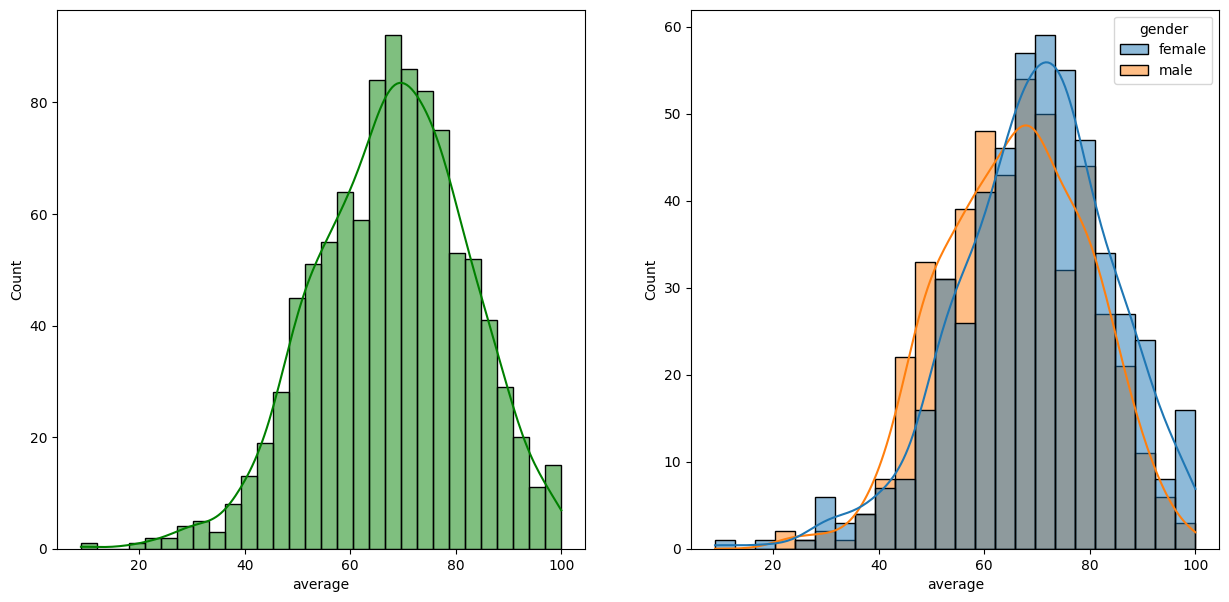

In [19]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()


<Axes: xlabel='total_score', ylabel='Count'>

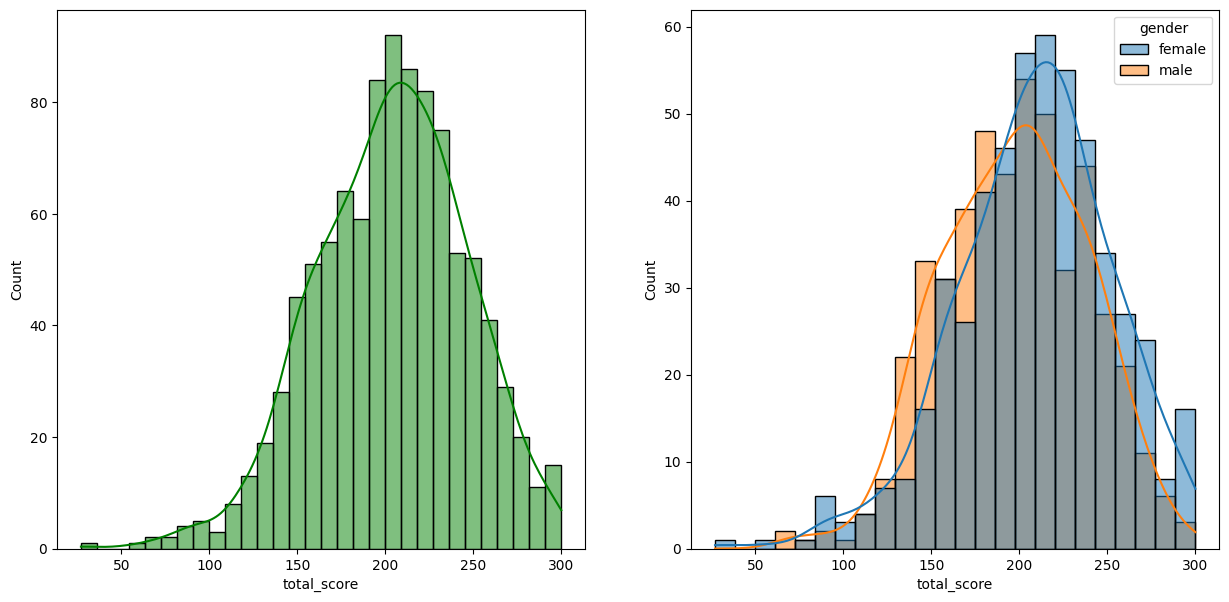

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="total_score",kde=True,hue="gender")

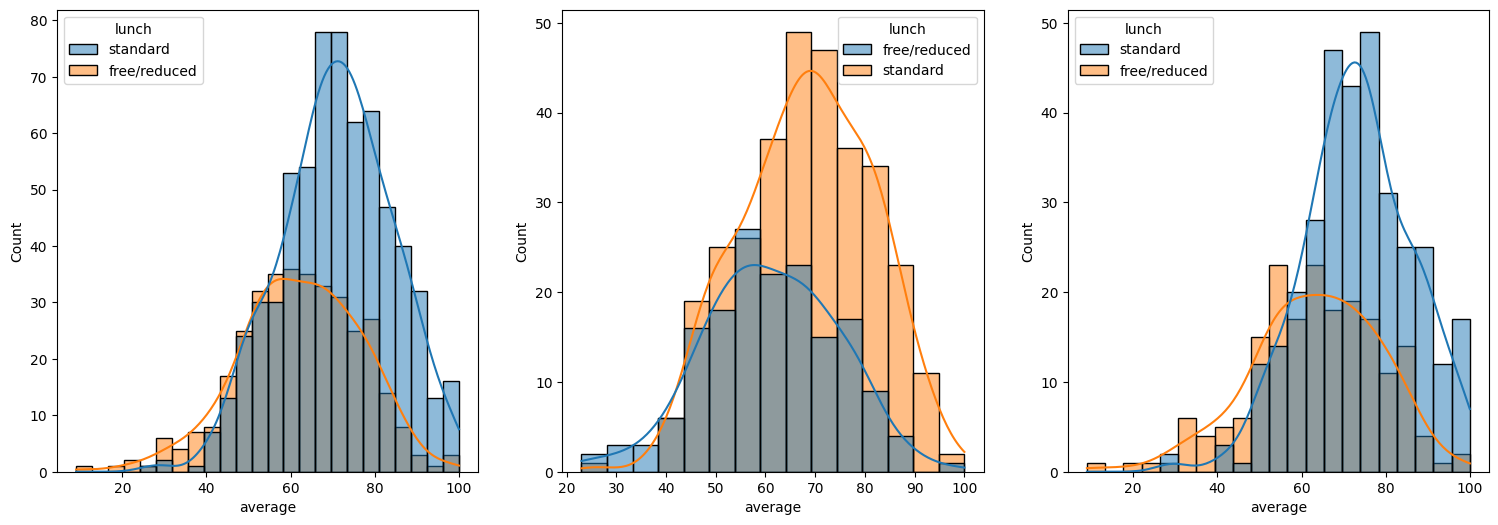

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x="average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="lunch")
plt.show()

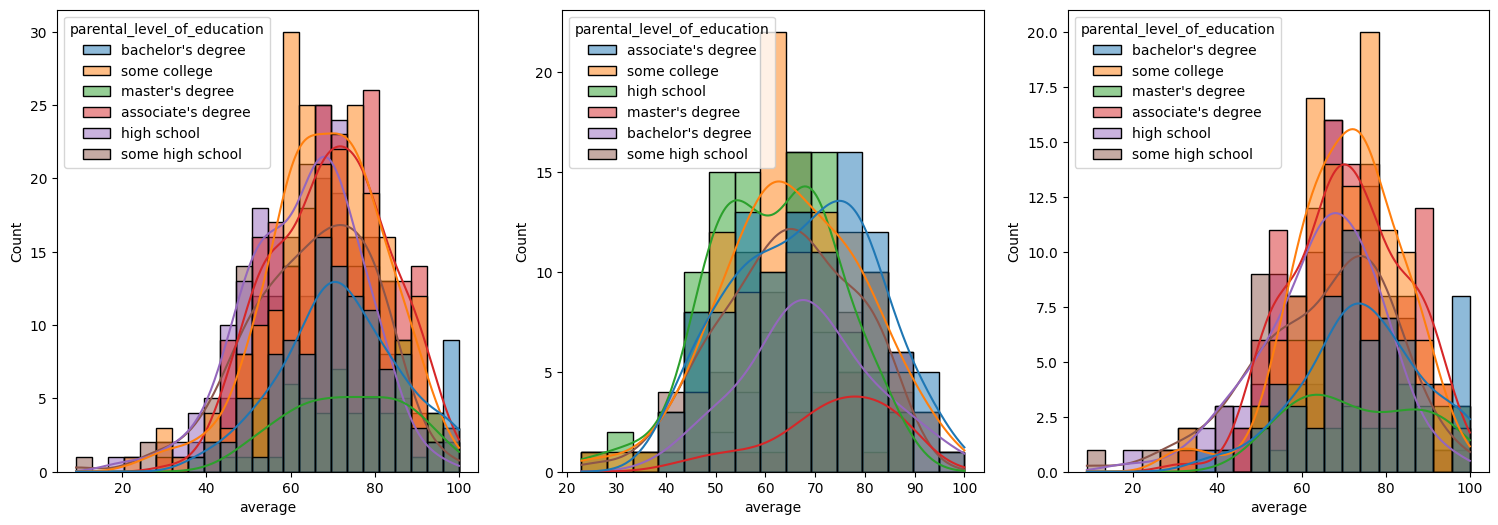

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="parental_level_of_education")
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x="average",kde=True,hue="parental_level_of_education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="parental_level_of_education")
plt.show()

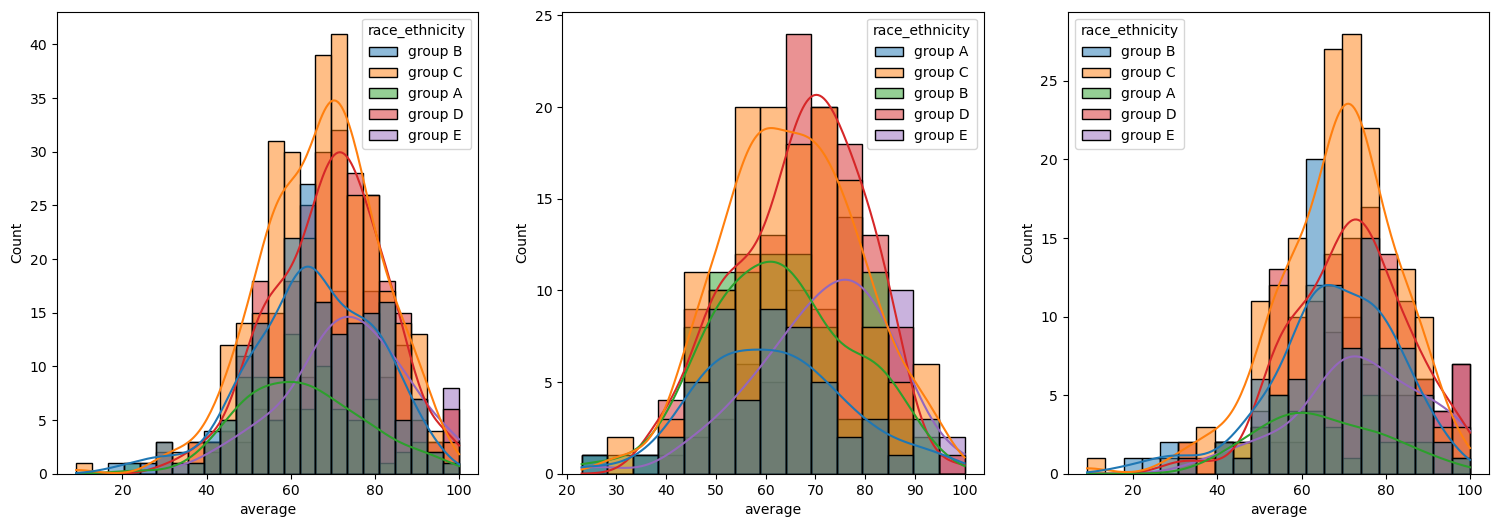

In [140]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="race_ethnicity")
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x="average",kde=True,hue="race_ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="race_ethnicity")
plt.show()

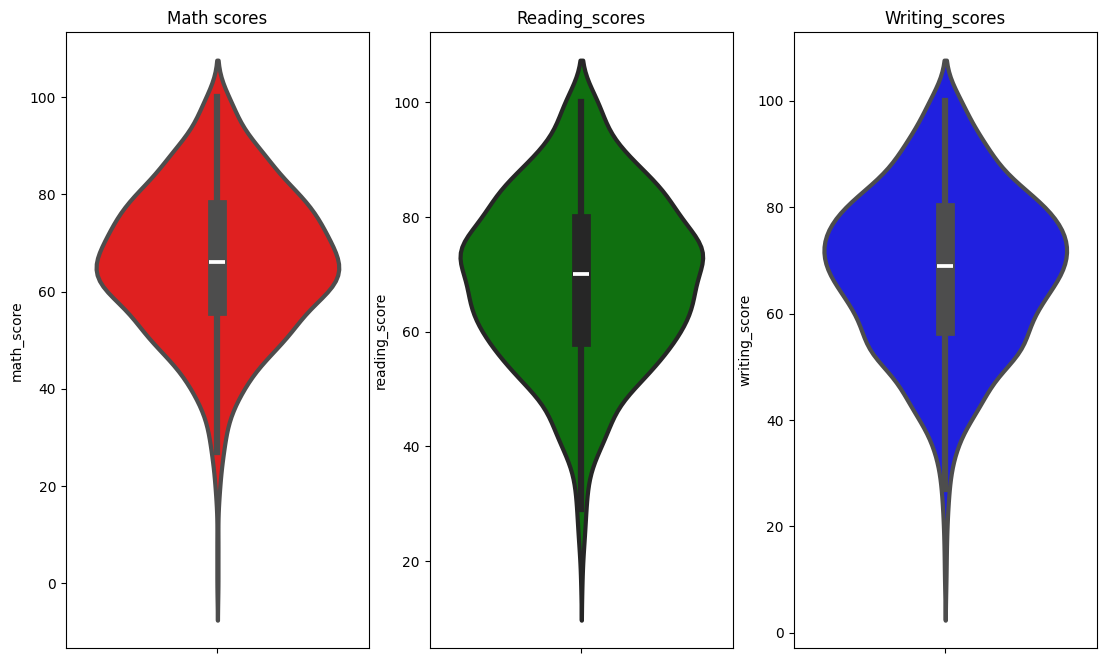

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math scores")
sns.violinplot(y="math_score",data=df,color="red",linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading_scores")
sns.violinplot(y="reading_score",data=df,color="green",linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing_scores")
sns.violinplot(y="writing_score",data=df,color="blue",linewidth=3)
plt.show()



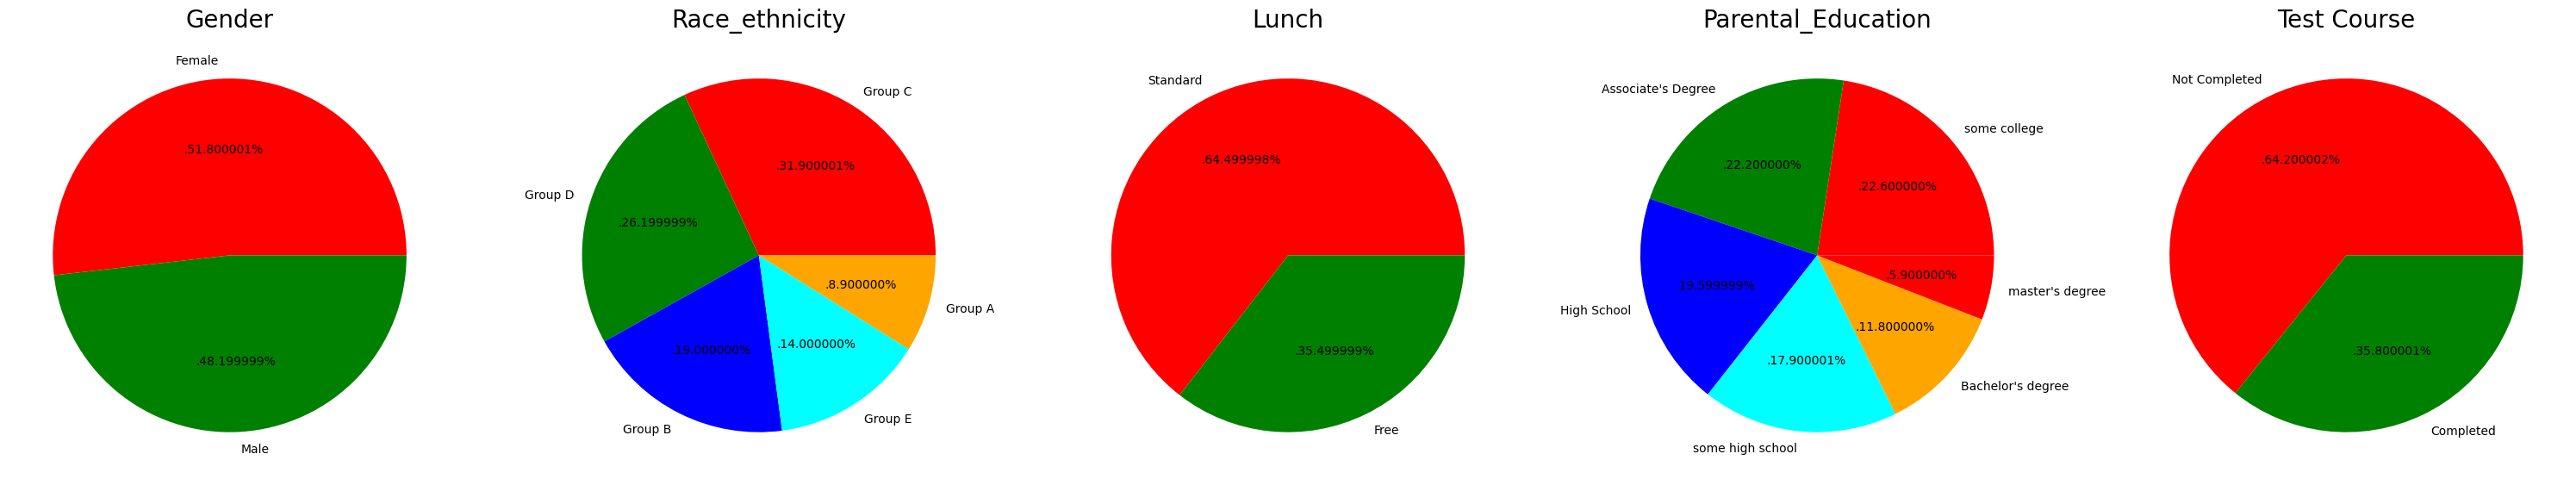

In [24]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df["gender"].value_counts()
labels="Female","Male"
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Gender",fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels="Group C","Group D","Group B","Group E","Group A"
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Race_ethnicity",fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels="Standard","Free"
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Lunch",fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['parental_level_of_education'].value_counts()
labels="some college","Associate's Degree","High School","some high school","Bachelor's degree","master's degree"
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Parental_Education",fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels="Not Completed","Completed"
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Test Course",fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


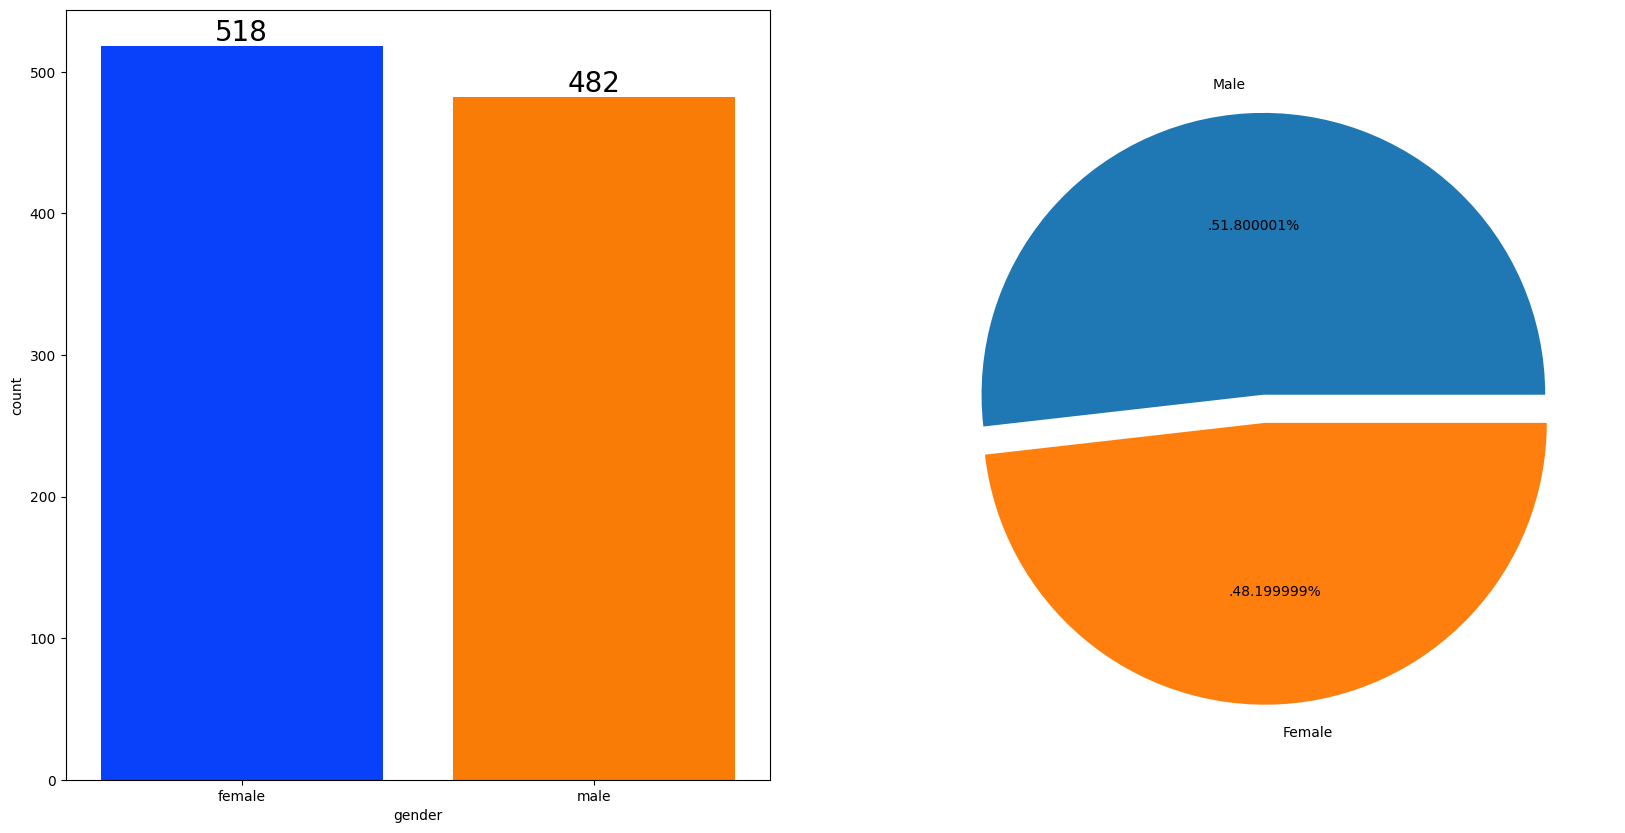

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=["Male","Female"],explode=[0,0.1],autopct=".%2f%%")
plt.show()   

In [26]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


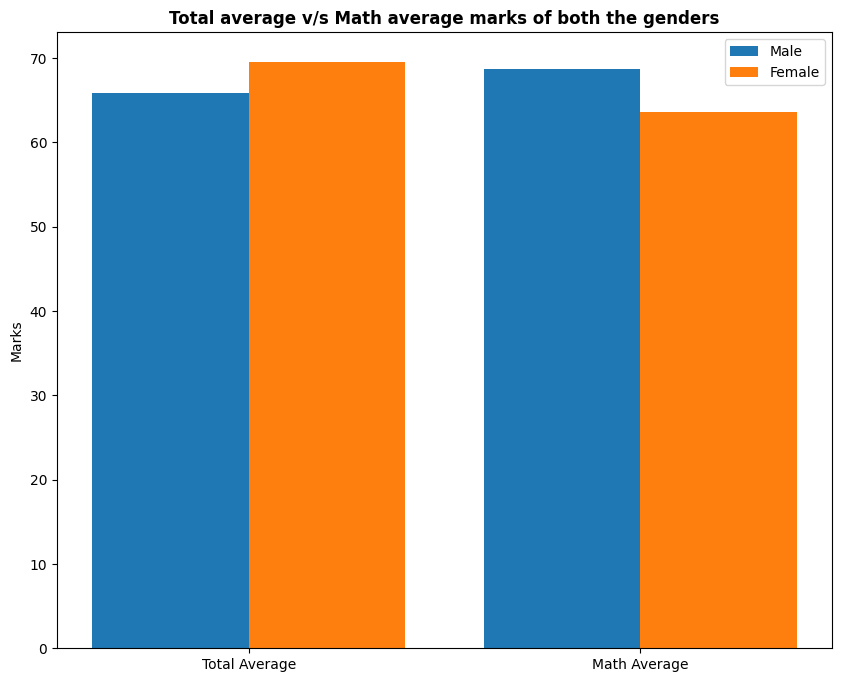

In [27]:
plt.figure(figsize=(10,8))
X=["Total Average","Math Average"]

female_scores=[gender_group["average"][0],gender_group['math_score'][0]]
male_scores=[gender_group['average'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis -0.2,male_scores,0.4,label="Male")
plt.bar(X_axis +0.2,female_scores,0.4,label="Female")

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders",fontweight="bold")
plt.legend()
plt.show()


In [28]:
female_scores=[gender_group["average"][0],gender_group['math_score'][0]]
female_scores

[69.56949806949807, 63.633204633204635]

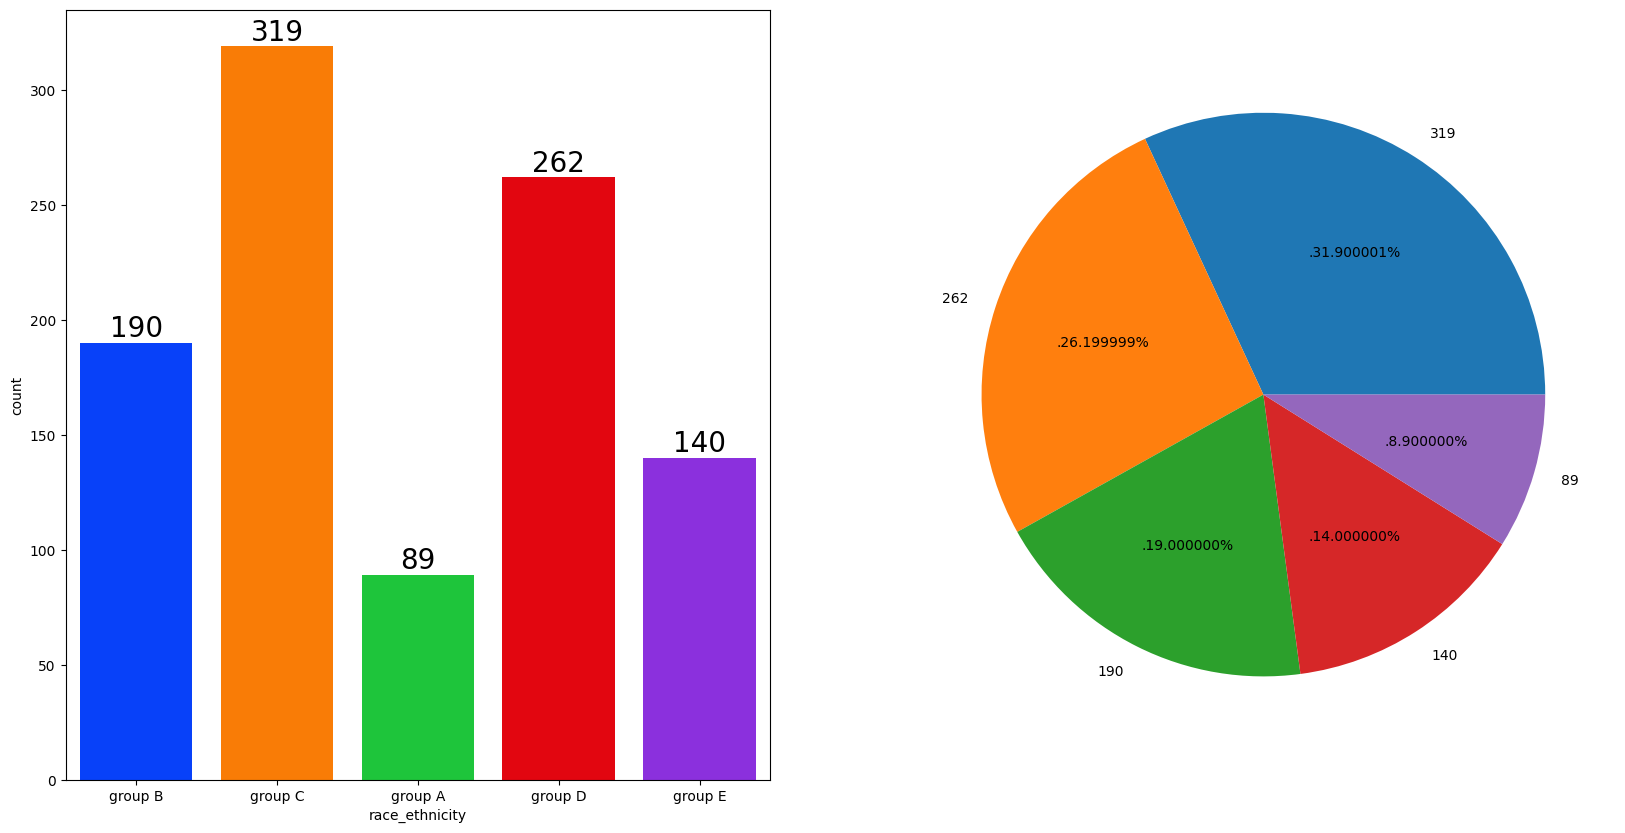

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df["race_ethnicity"].value_counts(),autopct=".%2f%%")
plt.show() 




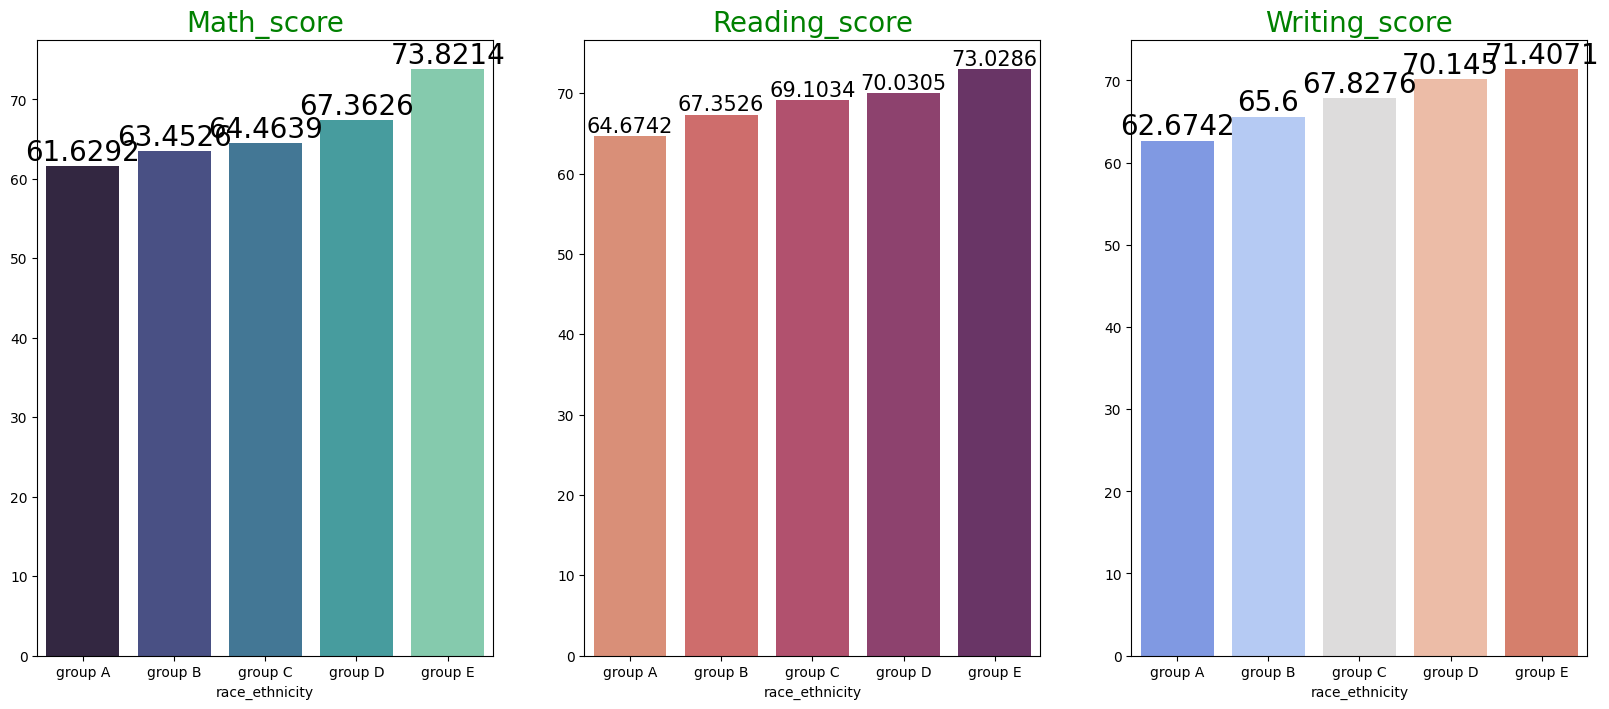

In [ ]:
race_group=df.groupby("race_ethnicity")
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=race_group['math_score'].mean().index,y=race_group["math_score"].mean().values,palette="mako",ax=ax[0])
ax[0].set_title("Math_score",color="green",size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    
sns.barplot(x=race_group['reading_score'].mean().index,y=race_group["reading_score"].mean().values,palette="flare",ax=ax[1])
ax[1].set_title("Reading_score",color="green",size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color="black",size=15)
    
sns.barplot(x=race_group['writing_score'].mean().index,y=race_group["writing_score"].mean().values,palette="coolwarm",ax=ax[2])
ax[2].set_title("Writing_score",color="green",size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color="black",size=20)      


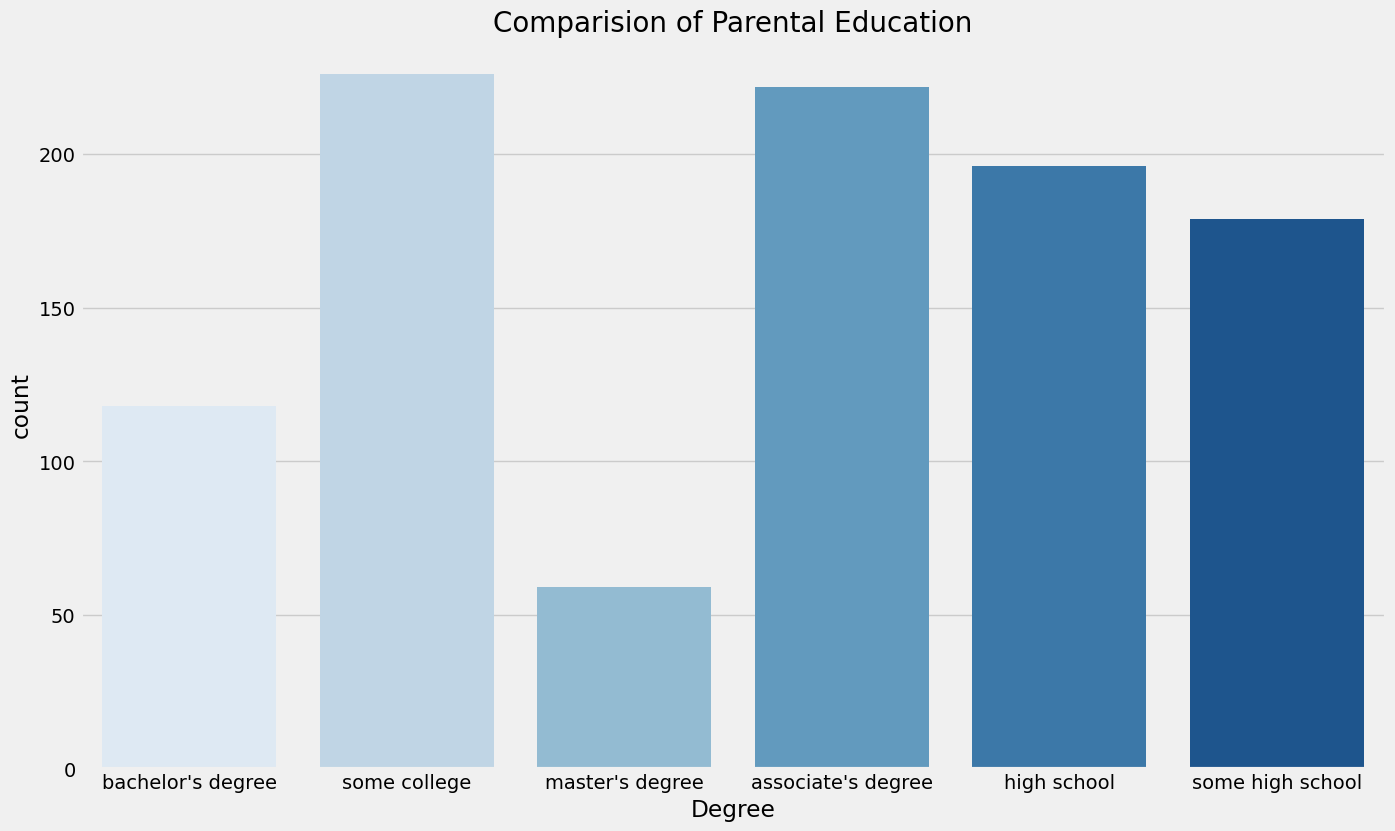

In [165]:
df.columns = df.columns.str.strip()
plt.rcParams["figure.figsize"]=(15,9)
plt.style.use("fivethirtyeight")
sns.countplot(x="parental_level_of_education",data=df,palette="Blues")
plt.title("Comparision of Parental Education",fontweight=30,fontsize=20)
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

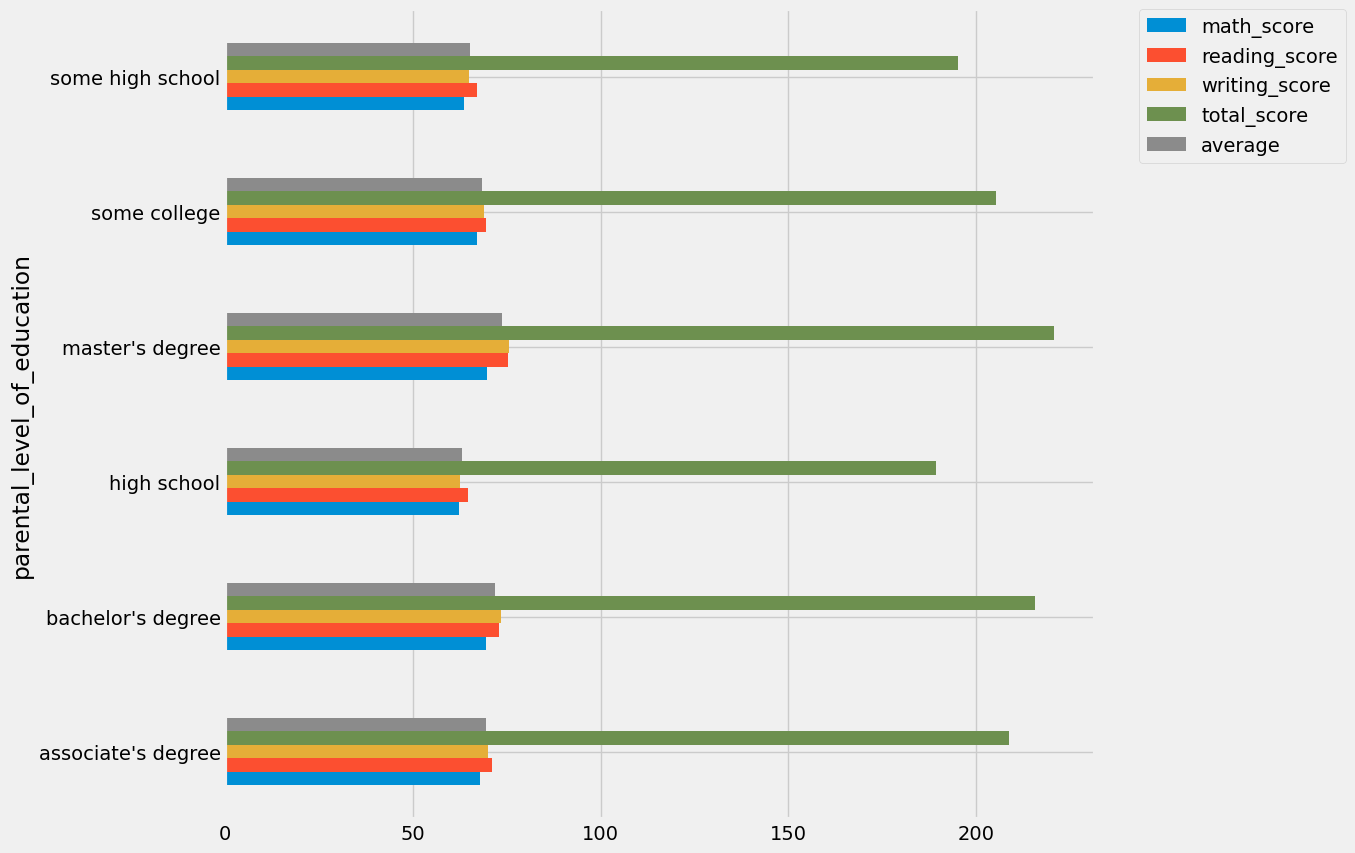

In [170]:
df.columns = df.columns.str.strip()
numeric_df=df.select_dtypes(include=["number"])

df.groupby("parental_level_of_education")[numeric_df.columns].mean().plot(kind="barh",figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()


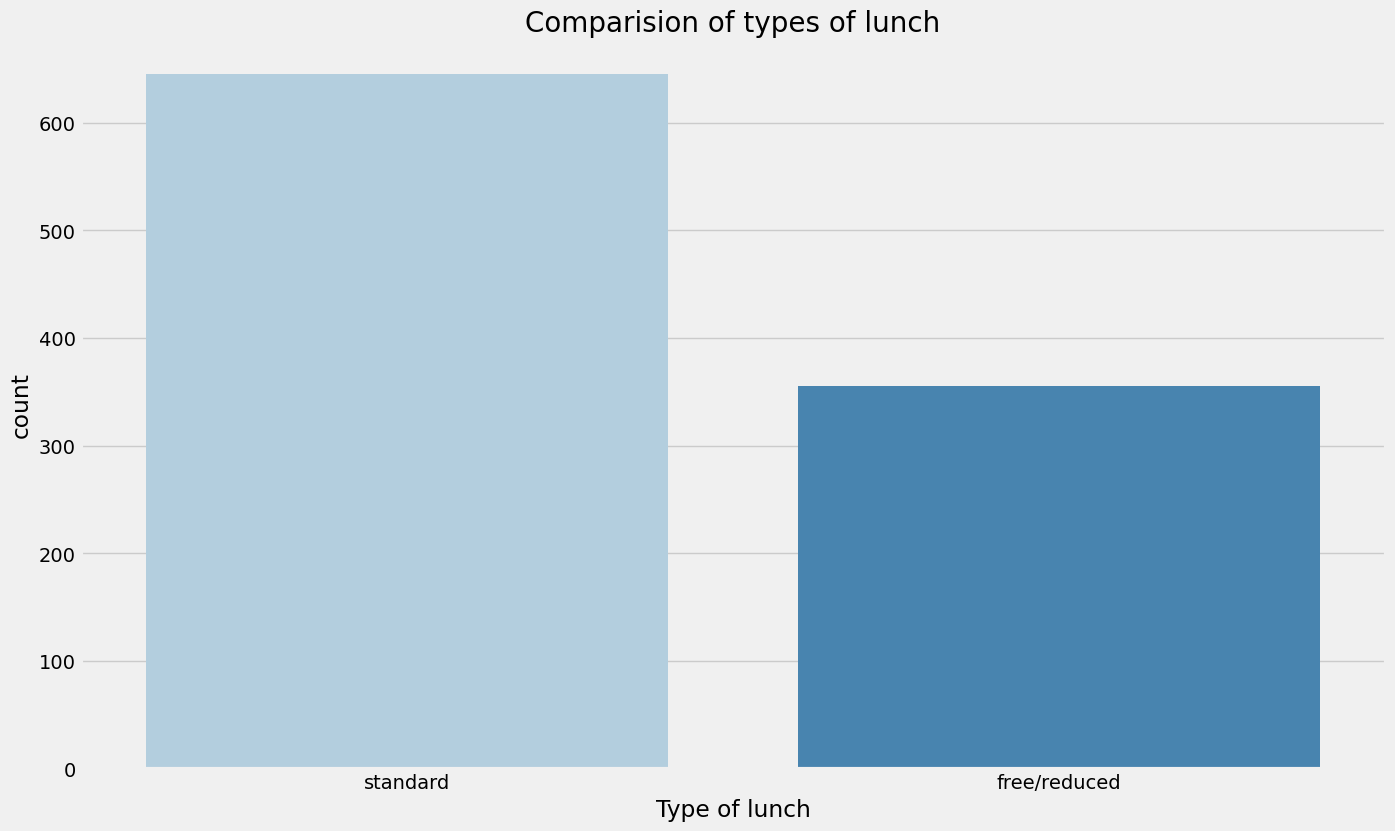

In [171]:
df.columns = df.columns.str.strip()
plt.rcParams["figure.figsize"]=(15,9)
plt.style.use("fivethirtyeight")
sns.countplot(x="lunch",data=df,palette="Blues")
plt.title("Comparision of types of lunch",fontweight=30,fontsize=20)
plt.xlabel("Type of lunch")
plt.ylabel("count")
plt.show()

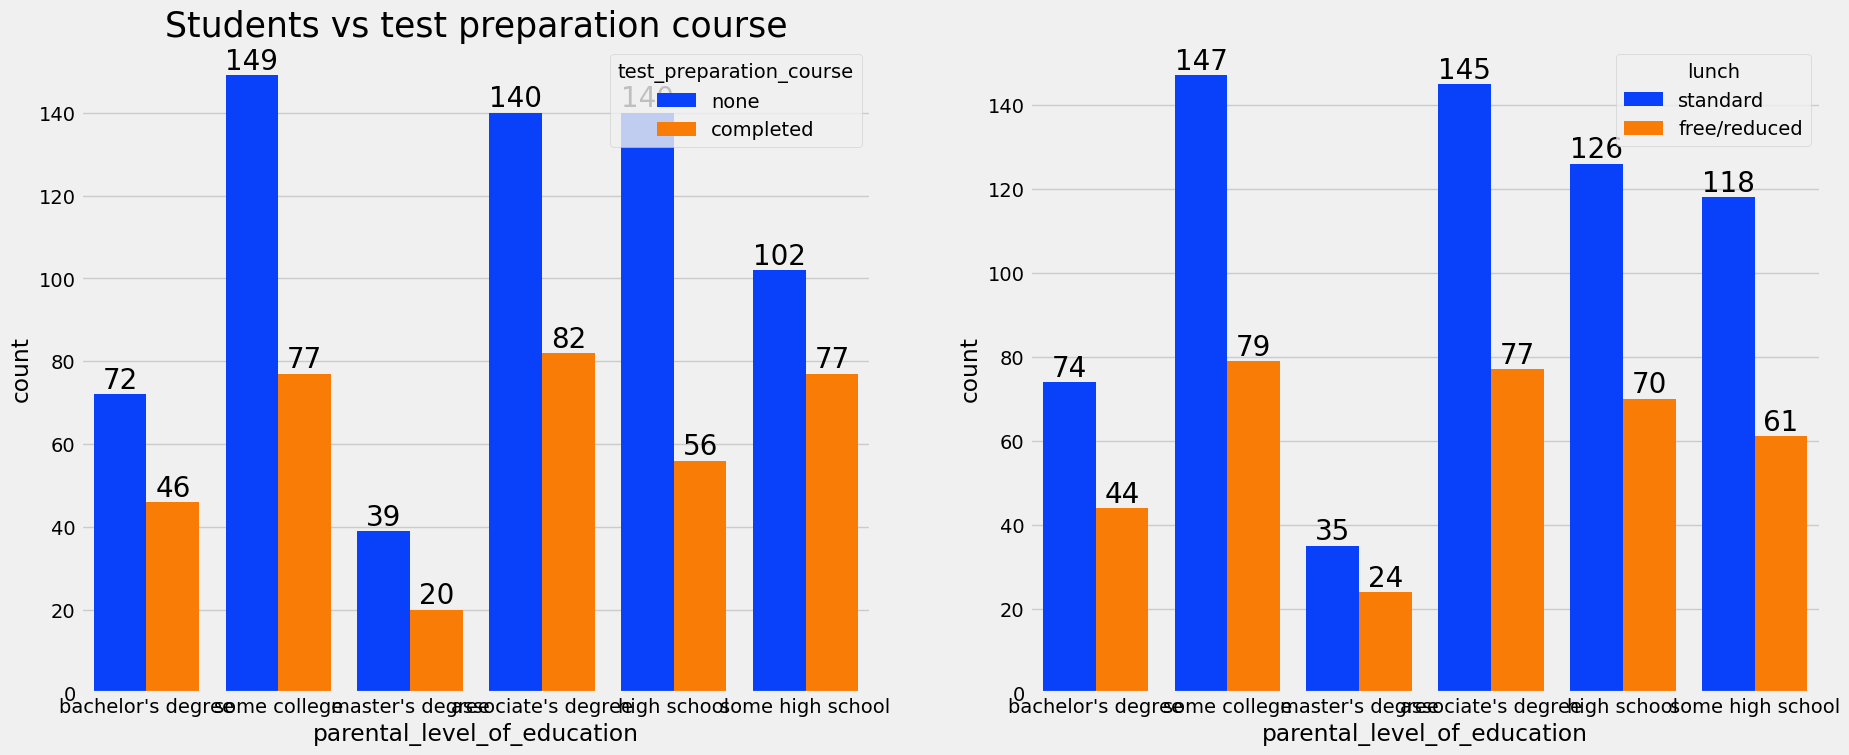

In [173]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot(x=df['parental_level_of_education'],data=df,palette="bright",hue="test_preparation_course",saturation=0.95,ax=ax[0])
ax[0].set_title("Students vs test preparation course",color="black",size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    

sns.countplot(x=df['parental_level_of_education'],data=df,palette="bright",hue="lunch",saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color="black",size=20)
    
    

<Axes: xlabel='lunch', ylabel='writing_score'>

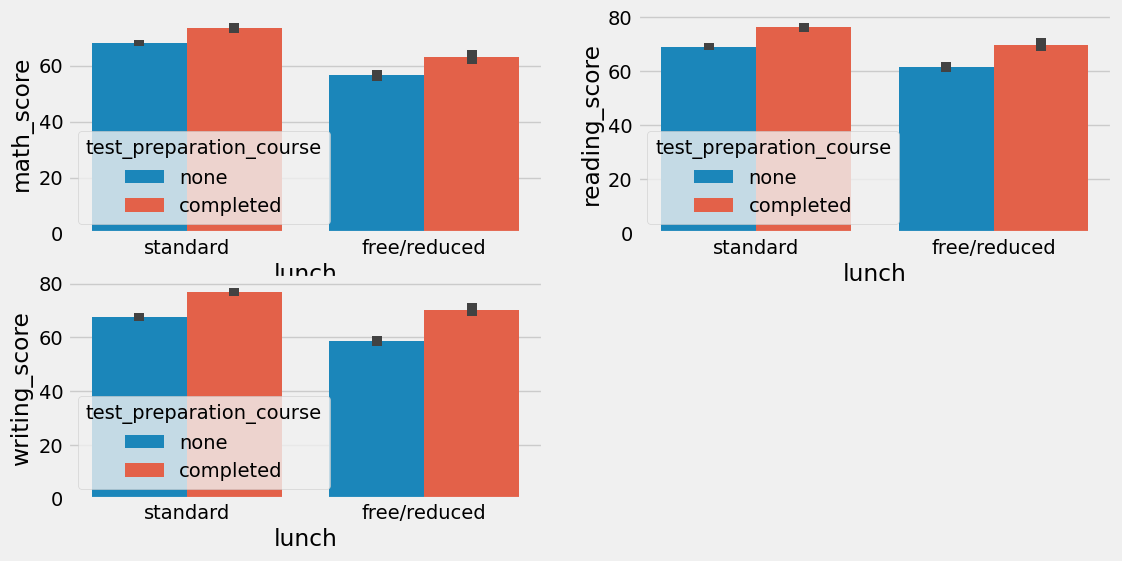

In [174]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df["lunch"],y=df["math_score"],hue=df["test_preparation_course"])
plt.subplot(2,2,2)
sns.barplot(x=df["lunch"],y=df["reading_score"],hue=df["test_preparation_course"])
plt.subplot(2,2,3)
sns.barplot(x=df["lunch"],y=df["writing_score"],hue=df["test_preparation_course"])

<Axes: >

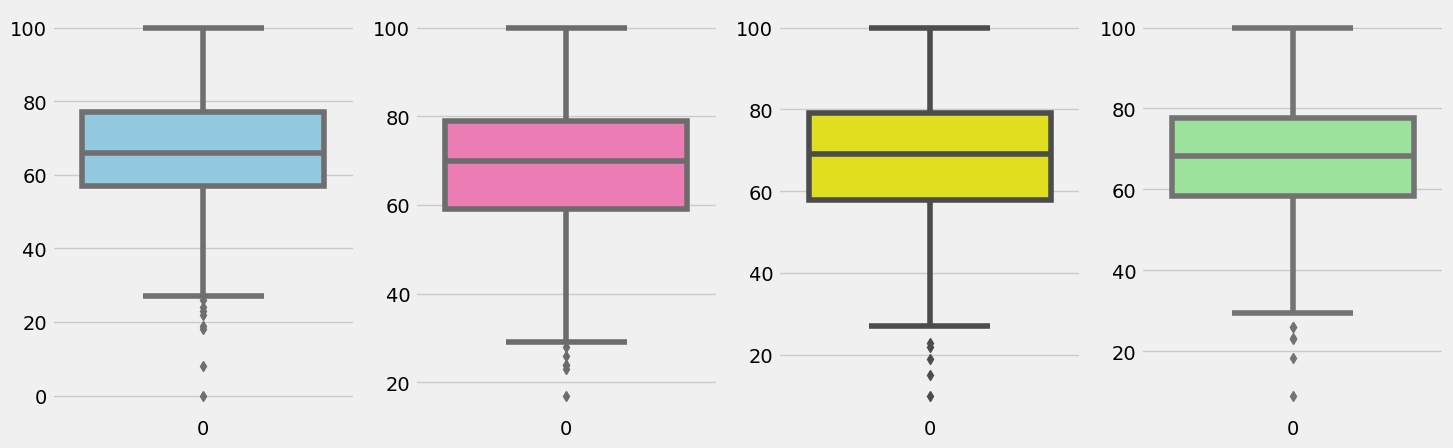

In [175]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df["math_score"],color="skyblue")
plt.subplot(142)
sns.boxplot(df["reading_score"],color="hotpink")
plt.subplot(143)
sns.boxplot(df["writing_score"],color="yellow")
plt.subplot(144)
sns.boxplot(df["average"],color="lightgreen")

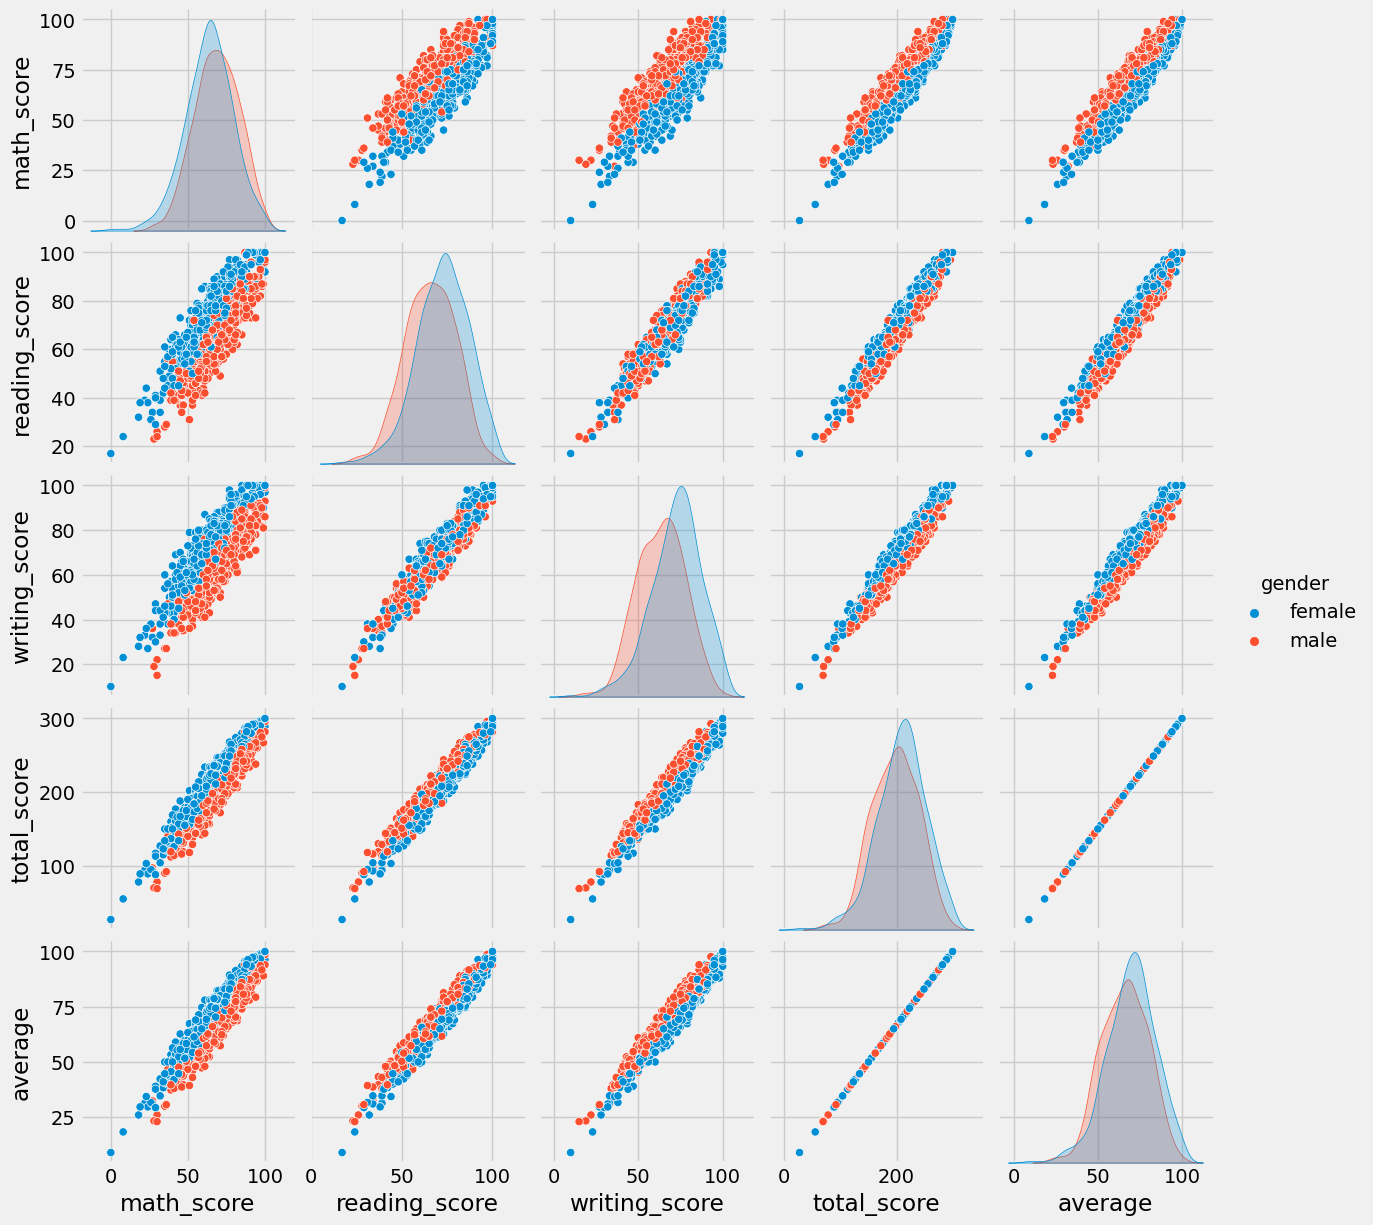

In [177]:
sns.pairplot(df,hue="gender")
plt.show()